### Linear Regression

Developing Linear Regression Algorithm from Scratch using Normal Equation.

We use Linear Regression algorithm to build a relationship between Dependent Variable and one or more Independent Variables. In case of Linear Regression our dependent variable is of continuous type. It is really simple to use and there are multiple ways to work on it, like using Gradient Descent or using Normal Equation.
In this notebook we have used Normal Equation, that will give the least cost function in one step only

In [1]:
# Importing required Libraries

import pandas as pd
import numpy as np
from sklearn.datasets  import load_boston
import matplotlib.pyplot as inline
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Using **load_boston** dataset fetched directly from sk

In [2]:
X, y = load_boston(return_X_y = True)

df = pd.DataFrame(X)

df["y"] = y

In [3]:
# First 5 rows
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,y
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [4]:
# Looking at info of Dataset such as type of variables, no. of missing values.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
0     506 non-null float64
1     506 non-null float64
2     506 non-null float64
3     506 non-null float64
4     506 non-null float64
5     506 non-null float64
6     506 non-null float64
7     506 non-null float64
8     506 non-null float64
9     506 non-null float64
10    506 non-null float64
11    506 non-null float64
12    506 non-null float64
y     506 non-null float64
dtypes: float64(14)
memory usage: 55.5 KB


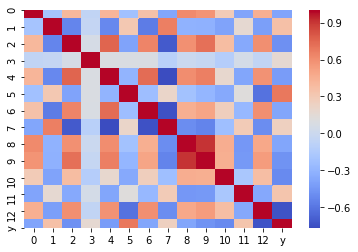

In [5]:
# We will look at Correlation between variables, although motive of this notebook is not to pre-process, clean or work on features.
# But it is recommended to work on features first then put those variables in to the model

sns.heatmap(df.corr(), cmap = "coolwarm")

Linear Relationship Equation we want to solve:
$$
y = W_o + W_n . X_n     
$$

n = 1,2,3,.....n



$$
Normal Equation = (X^T . X)^-  . (X^T.Y)
$$

where X is a matrix of Independent Variables and Y is a matrix of Dependent Variable. Above Normal Equation would give us the values of Wo, W1, W2,.... Wn. That we can use to find our optimal equation.

### Without Intercept Model

When we dont consider the intercept but only coefficients associated with Variables.

In [6]:
X = df.drop(["y"], axis = 1)
X.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [7]:
y = df[["y"]]
y.head()

,y
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [8]:
# Finding Normal Equation

Xt_X_inv = np.linalg.inv(np.dot(X.T, X))
Xt_y = np.dot(X.T, y)
coefs = np.array(np.dot(Xt_X_inv,Xt_y))
coefs

array([[-9.28965170e-02],
       [ 4.87149552e-02],
       [-4.05997958e-03],
       [ 2.85399882e+00],
       [-2.86843637e+00],
       [ 5.92814778e+00],
       [-7.26933458e-03],
       [-9.68514157e-01],
       [ 1.71151128e-01],
       [-9.39621540e-03],
       [-3.92190926e-01],
       [ 1.49056102e-02],
       [-4.16304471e-01]])

Now as we have got coefficients, we can easily use these to make the predictions

In [9]:
# Predictions on raw data

y_preds = np.sum(np.dot(X, coefs), axis = 1)
y_preds[0:20]

array([29.09826353, 24.50227548, 31.22742641, 29.7071035 , 29.56479572,
       25.29376224, 21.53041161, 19.10333426, 11.09336136, 18.25932202,
       19.33401835, 20.4158837 , 19.66602494, 20.66457506, 20.52388857,
       20.11740519, 21.53034318, 18.36426279, 15.75504665, 18.82001911])

### With Intercept Model

##### Now We will add one more variable Intercept in our dataset with all values as 1.

In [10]:
X_I = X.copy()
X_I["intercept"] = 1
X_I.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,intercept
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,1
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,1
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,1
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,1
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,1


In [11]:
# Repeating all the previous steps to find the normal equation

In [12]:
# Finding Normal Equation

I_Xt_X_inv = np.linalg.inv(np.dot(X_I.T,X_I))
I_Xt_y = np.dot(X_I.T, y)
I_coefs = np.array(np.dot(I_Xt_X_inv,I_Xt_y))
I_coefs

array([[-1.08011358e-01],
       [ 4.64204584e-02],
       [ 2.05586264e-02],
       [ 2.68673382e+00],
       [-1.77666112e+01],
       [ 3.80986521e+00],
       [ 6.92224640e-04],
       [-1.47556685e+00],
       [ 3.06049479e-01],
       [-1.23345939e-02],
       [-9.52747232e-01],
       [ 9.31168327e-03],
       [-5.24758378e-01],
       [ 3.64594884e+01]])

Above first 13 numbers refer to the coefficients for variables and last number, i.e 3.64595+01, refers to the intercept of our model

In [13]:
# Predictions on raw data

I_y_preds = np.sum(np.dot(X_I, I_coefs), axis = 1)
I_y_preds[0:20]

array([30.00384338, 25.02556238, 30.56759672, 28.60703649, 27.94352423,
       25.25628446, 23.00180827, 19.53598843, 11.52363685, 18.92026211,
       18.99949651, 21.58679568, 20.90652153, 19.55290281, 19.28348205,
       19.29748321, 20.52750979, 16.91140135, 16.17801106, 18.40613603])

#### Analyzing output of both the Models in comparison with actuals Y

In [20]:
def root_mean_squared_error(y_act, y_pred):
    rmse = np.sum((y - np.reshape(y_pred,(506,1)))**2)
    return np.sqrt(rmse/len(y_act))

In [21]:
print("Root Mean Squared Error from Without Intercept Model:",root_mean_squared_error(y, y_preds))
print("Root Mean Squared Error from With Intercept Model:",root_mean_squared_error(y, I_y_preds))

Root Mean Squared Error from Without Intercept Model: y    4.915903
dtype: float64
Root Mean Squared Error from With Intercept Model: y    4.679191
dtype: float64


[]

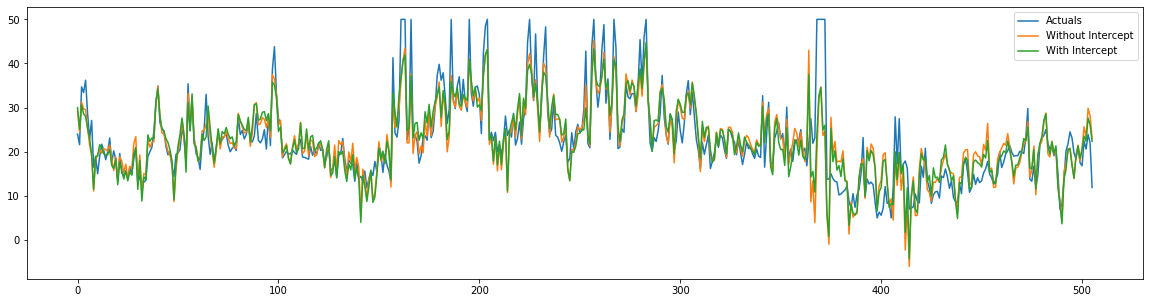

In [16]:
plt.figure(figsize = (20,5))
plt.plot(y, label = "Actuals")
plt.plot(y_preds, label = "Without Intercept")
plt.plot(I_y_preds, label = "With Intercept")
plt.legend()
plt.plot()

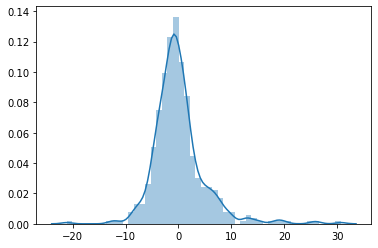

In [19]:
# Assumption of Normality of Errors  - Without Intercept Model
sns.distplot(y - np.reshape(y_preds,(506,1)))

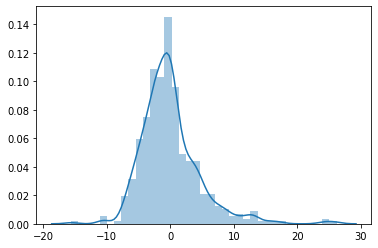

In [22]:
# Assumption of Normality of Errors - With Intercept Model
sns.distplot(y - np.reshape(I_y_preds,(506,1)))